# Project 1 - Revisited

## Task
- For this assignment, you will revisit your first project to predict supermarket sales. You will apply what you've learned this week to explain how your models made their predictions.


## Project 1 Revisited - Part 1: Remaking, Saving, and Explaining Your Models
For this part of the project, you will be producing a new version of your final project notebook using the updated tools in sklearn v1.1. 

- Create a new notebook called "Project 1 - Revisited.ipynb" in your project repo.
    - You may either make a copy of your prior notebook that you will modify,
or you can start a new blank notebook and copy over the code from your old notebook (as needed).
- Remake your X_train and X_test as DataFrames with the feature names extracted from the column transformer instead of combining your preprocessor and model into 1 pipeline.

## LinearRegression
- Fit and evaluate your LinearRegresion model using your dataframe X_train and X_test data.
- Extract and visualize the coefficients that your model determined.
    - Select the top 3 most impactful features and interpret their coefficients in plain English.
- Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).


## Tree-Based Model
- Fit and evaluate your tree-based regression model using your dataframe X_train and X_test data.
- Extract and visualize the feature importances that your model determined.
    - Identify the top 5 most important features.
- Save your figure as a .png file inside your repository  (you will need this for the final piece of this assignment - Update Your README).

## Serialize Your Best Models with Joblib
- Once you've finished updating and explaining your models, you must save the following key: value pairs as a dictionary in a joblib file named "best-models.joblib":
    - "preprocessor": your preprocessing  column transformer
    - "X_train": your training features.
    - "X_test": your test features.
    - "y_train": your training target.
    - "y_test": your test target.
    - "LinearRegression": your best linear regression
    - Your tree-based model's class name: your best tree-based model.
        - e.g. "RandomForestRegressor"/"DecisionTreeRegressor"
    - Save your joblib file inside your repository. (You will work with these models again in the next core assignment.)

## Update your README.
- Insert your exported figures from above into your README file. You should have the following:
    - Your LinearRegression coefficients plot.
         - Your interpretation of your coefficients.
    - Your tree-based model's feature importances.
        - Your interpretation of your feature importances. 

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 42
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)

In [4]:
df = pd.read_csv('/Users/danielbarella/Downloads/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [7]:
sp_df = df.copy()

In [8]:
sp_df = sp_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [9]:
sp_df.shape

(8523, 10)

In [10]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [11]:
sp_df.nunique

<bound method DataFrame.nunique of       Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      Item_MRP  Outlet_Estab

In [12]:
sp_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
sp_df = sp_df.replace({'Item_Fat_Content':{'LF': 'Low Fat','reg': 'Regular','low fat': 'Low Fat'}})
sp_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
sp_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
sp_df['Outlet_Size'] = sp_df['Outlet_Size'].replace('High', 'Large')
sp_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

In [16]:
sp_df.isna().sum()


Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
y = sp_df['Item_Outlet_Sales']
X = sp_df.drop(columns = 'Item_Outlet_Sales')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = SEED)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,2002,NaN,Tier 2,Supermarket Type1


In [22]:
## make categorical selector and verify it works 
cat_sel = make_column_selector(dtype_include='object')
cat_sel(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [23]:
## make numeric selector and verify it works 
num_sel = make_column_selector(dtype_include='number')
num_sel(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [24]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop='if_binary', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

## new df's
X_train_df = pd.DataFrame(preprocessor.transform(X_train), 
                          columns = feature_names, index = X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                          columns = feature_names, index = X_test.index)
X_test_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Large,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,0.331009,-0.776646,-0.998816,-1.293807,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,-1.179892,0.100317,-1.585194,-0.102145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,0.378447,-0.482994,-1.595784,0.136187,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## LinearRegression



In [25]:
## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)

Training Data:	R^2= 0.56	RMSE= 1139.10
Test Data:	R^2= 0.57	RMSE= 1092.86


In [27]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

In [28]:
coeffs = get_coeffs_linreg(lin_reg)
coeffs

Outlet_Location_Type_Tier 3       -4.140763e+14
Outlet_Location_Type_Tier 2       -4.140763e+14
Outlet_Location_Type_Tier 1       -4.140763e+14
Item_Type_Dairy                   -2.137034e+14
Item_Type_Soft Drinks             -2.137034e+14
Item_Type_Breads                  -2.137034e+14
Item_Type_Others                  -2.137034e+14
Item_Type_Snack Foods             -2.137034e+14
Item_Type_Meat                    -2.137034e+14
Item_Type_Frozen Foods            -2.137034e+14
Item_Type_Baking Goods            -2.137034e+14
Item_Type_Household               -2.137034e+14
Item_Type_Hard Drinks             -2.137034e+14
Item_Type_Health and Hygiene      -2.137034e+14
Item_Type_Canned                  -2.137034e+14
Item_Type_Starchy Foods           -2.137034e+14
Item_Type_Breakfast               -2.137034e+14
Item_Type_Fruits and Vegetables   -2.137034e+14
Item_Type_Seafood                 -2.137034e+14
Item_Visibility                   -2.162197e+01
Item_Weight                       -8.227

In [29]:
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
coeffs

Outlet_Location_Type_Tier 3       -414,076,288,765,593.25
Outlet_Location_Type_Tier 2       -414,076,288,765,381.50
Outlet_Location_Type_Tier 1       -414,076,288,765,330.06
Item_Type_Dairy                   -213,703,438,833,445.38
Item_Type_Soft Drinks             -213,703,438,833,379.25
Item_Type_Breads                  -213,703,438,833,367.72
Item_Type_Others                  -213,703,438,833,365.56
Item_Type_Snack Foods             -213,703,438,833,361.09
Item_Type_Meat                    -213,703,438,833,350.72
Item_Type_Frozen Foods            -213,703,438,833,340.78
Item_Type_Baking Goods            -213,703,438,833,339.28
Item_Type_Household               -213,703,438,833,333.69
Item_Type_Hard Drinks             -213,703,438,833,325.66
Item_Type_Health and Hygiene      -213,703,438,833,312.03
Item_Type_Canned                  -213,703,438,833,311.34
Item_Type_Starchy Foods           -213,703,438,833,297.34
Item_Type_Breakfast               -213,703,438,833,294.06
Item_Type_Frui

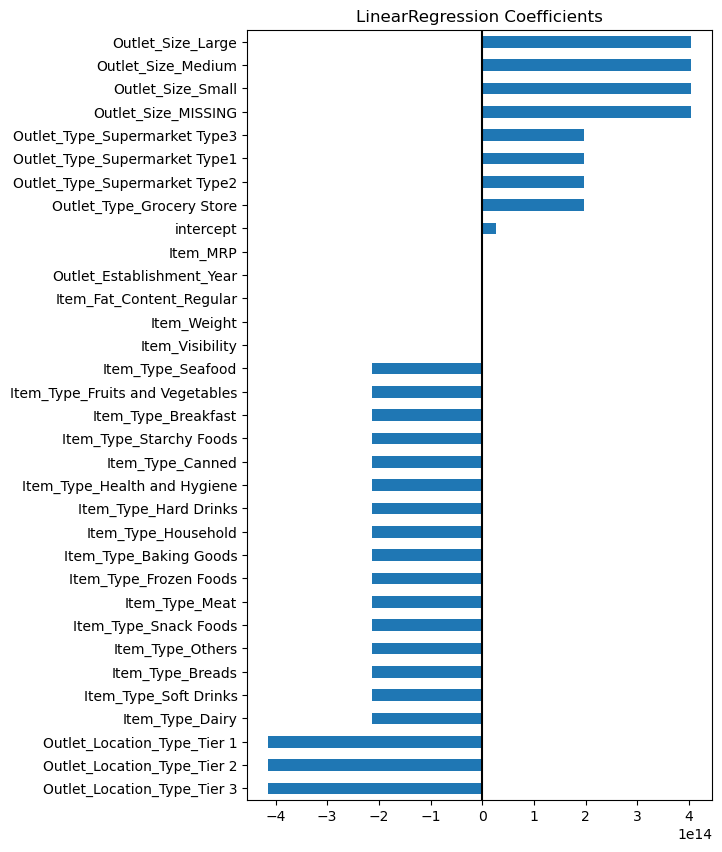

In [30]:
## Plot the coefficients
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,10))
ax.axvline(0,color='k')
ax.set_title('LinearRegression Coefficients');

In [31]:
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
coeff_rank

Outlet_Location_Type_Tier 3       33.00
Outlet_Location_Type_Tier 2       32.00
Outlet_Location_Type_Tier 1       31.00
Outlet_Size_Large                 30.00
Outlet_Size_Medium                29.00
Outlet_Size_Small                 28.00
Outlet_Size_MISSING               27.00
Item_Type_Dairy                   26.00
Item_Type_Soft Drinks             25.00
Item_Type_Breads                  24.00
Item_Type_Others                  23.00
Item_Type_Snack Foods             22.00
Item_Type_Meat                    21.00
Item_Type_Frozen Foods            20.00
Item_Type_Baking Goods            19.00
Item_Type_Household               18.00
Item_Type_Hard Drinks             17.00
Item_Type_Health and Hygiene      16.00
Item_Type_Canned                  15.00
Item_Type_Starchy Foods           14.00
Item_Type_Breakfast               13.00
Item_Type_Fruits and Vegetables   12.00
Item_Type_Seafood                 11.00
Outlet_Type_Supermarket Type3     10.00
Outlet_Type_Supermarket Type1      9.00


In [34]:
top_n_features = coeff_rank.head(10)
top_n_features

Outlet_Location_Type_Tier 3   33.00
Outlet_Location_Type_Tier 2   32.00
Outlet_Location_Type_Tier 1   31.00
Outlet_Size_Large             30.00
Outlet_Size_Medium            29.00
Outlet_Size_Small             28.00
Outlet_Size_MISSING           27.00
Item_Type_Dairy               26.00
Item_Type_Soft Drinks         25.00
Item_Type_Breads              24.00
dtype: float64

In [35]:
 ## Slicing out the top_n_features names to visualize
plot_vals = coeffs.loc[top_n_features.index]
plot_vals

Outlet_Location_Type_Tier 3   -414,076,288,765,593.25
Outlet_Location_Type_Tier 2   -414,076,288,765,381.50
Outlet_Location_Type_Tier 1   -414,076,288,765,330.06
Outlet_Size_Large              403,943,824,580,259.81
Outlet_Size_Medium             403,943,824,579,679.94
Outlet_Size_Small              403,943,824,579,625.06
Outlet_Size_MISSING            403,943,824,579,488.94
Item_Type_Dairy               -213,703,438,833,445.38
Item_Type_Soft Drinks         -213,703,438,833,379.25
Item_Type_Breads              -213,703,438,833,367.72
dtype: float64

In [36]:
top_n = 3
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n).index
plot_vals = coeffs.loc[top_n_features].sort_values()
plot_vals

Outlet_Location_Type_Tier 3   -414,076,288,765,593.25
Outlet_Location_Type_Tier 2   -414,076,288,765,381.50
Outlet_Location_Type_Tier 1   -414,076,288,765,330.06
dtype: float64

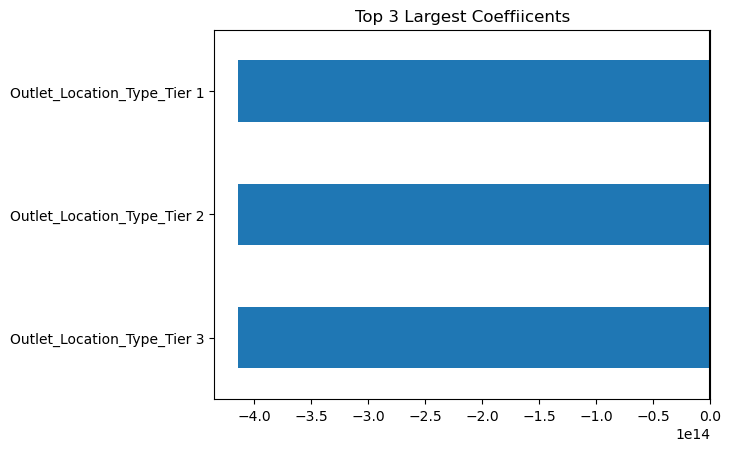

In [37]:
## Plot the coefficients
ax = plot_vals.sort_values().plot(kind='barh')#,figsize=(5,6))
ax.axvline(0,color='k')
ax.set_title(f'Top {top_n} Largest Coeffiicents');

In [40]:
def annotate_hbars(ax, ha='left',va='center',size=12,  xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha,va=va,size=size,
                        xytext=xytext, textcoords=textcoords)

In [41]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), 
                intercept=False,  intercept_name = "intercept", 
                annotate=False, ha='left',va='center', size=12, 
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and 
    if (intercept==False) & ( intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs#.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        
        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
            ylabel='Feature Names', 
            title=title)
    ax.axvline(0, color='k')
    if annotate==True:
        annotate_hbars(ax, ha=ha,va=va,size=size,xytext=xytext, textcoords=textcoords)
    return ax

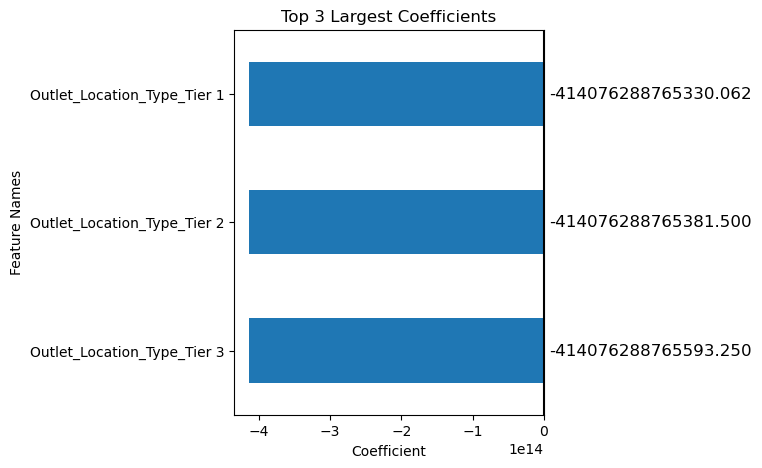

In [45]:
plot_coeffs(coeffs, top_n=3, annotate=True);
plt.savefig('LinearRegression.png', dpi=300, bbox_inches='tight')


- The Outlet Location Type, Tier 1,2,and 3, appear to have the largest effect on our target(Item_Outlet_Sales).


In [66]:
## saving variables for next lesson/notebook
import joblib
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'LinearRegression':lin_reg}
joblib.dump(export, 'lin_reg_best-models.joblib')

['lin_reg_best-models.joblib']

## Tree-Based Model


In [60]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [61]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

In [47]:
dec_tree = DecisionTreeRegressor(max_depth = 5, random_state=SEED)
dec_tree.fit(X_train_df,y_train)
evaluate_regression(dec_tree, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.60	RMSE= 1082.65
Test Data:	R^2= 0.59	RMSE= 1057.44


In [51]:
dec_tree.feature_importances_

array([8.00178937e-05, 8.66513380e-04, 5.52370349e-01, 2.59855959e-02,
       7.54189506e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.69466475e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.20965466e-01, 0.00000000e+00, 0.00000000e+00, 9.96539440e-02])

In [52]:
## Checking the number of feature importances matches the # of columns
print(len(dec_tree.feature_importances_))
print(len(X_train_df.columns))
len(dec_tree.feature_importances_) == len(X_train_df.columns)

32
32


True

In [53]:
## Saving the feature importances
importances = pd.Series(reg.feature_importances_, index= feature_names,
                       name='Feature Importance')
importances

Item_Weight                       0.05
Item_Visibility                   0.10
Item_MRP                          0.44
Outlet_Establishment_Year         0.04
Item_Fat_Content_Regular          0.01
Item_Type_Baking Goods            0.00
Item_Type_Breads                  0.00
Item_Type_Breakfast               0.00
Item_Type_Canned                  0.00
Item_Type_Dairy                   0.01
Item_Type_Frozen Foods            0.01
Item_Type_Fruits and Vegetables   0.01
Item_Type_Hard Drinks             0.00
Item_Type_Health and Hygiene      0.00
Item_Type_Household               0.01
Item_Type_Meat                    0.00
Item_Type_Others                  0.00
Item_Type_Seafood                 0.00
Item_Type_Snack Foods             0.01
Item_Type_Soft Drinks             0.01
Item_Type_Starchy Foods           0.00
Outlet_Size_Large                 0.00
Outlet_Size_MISSING               0.01
Outlet_Size_Medium                0.00
Outlet_Size_Small                 0.01
Outlet_Location_Type_Tier

In [54]:
importances.sum()

0.9999999999999998

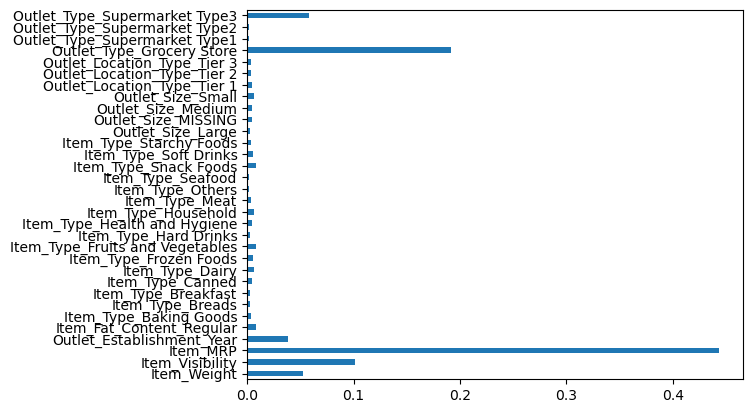

In [55]:
# plot importance
ax = importances.plot(kind='barh')

In [56]:
## Saving the feature importances sorted from largest to smallest (ascending=False)
sorted_importance = importances.sort_values(ascending=False)
sorted_importance

Item_MRP                          0.44
Outlet_Type_Grocery Store         0.19
Item_Visibility                   0.10
Outlet_Type_Supermarket Type3     0.06
Item_Weight                       0.05
Outlet_Establishment_Year         0.04
Item_Fat_Content_Regular          0.01
Item_Type_Snack Foods             0.01
Item_Type_Fruits and Vegetables   0.01
Outlet_Size_Small                 0.01
Item_Type_Household               0.01
Item_Type_Dairy                   0.01
Item_Type_Frozen Foods            0.01
Item_Type_Soft Drinks             0.01
Outlet_Size_MISSING               0.01
Outlet_Location_Type_Tier 1       0.00
Item_Type_Canned                  0.00
Outlet_Size_Medium                0.00
Item_Type_Health and Hygiene      0.00
Item_Type_Baking Goods            0.00
Outlet_Location_Type_Tier 2       0.00
Item_Type_Meat                    0.00
Item_Type_Starchy Foods           0.00
Outlet_Location_Type_Tier 3       0.00
Item_Type_Hard Drinks             0.00
Item_Type_Breakfast      

<AxesSubplot: >

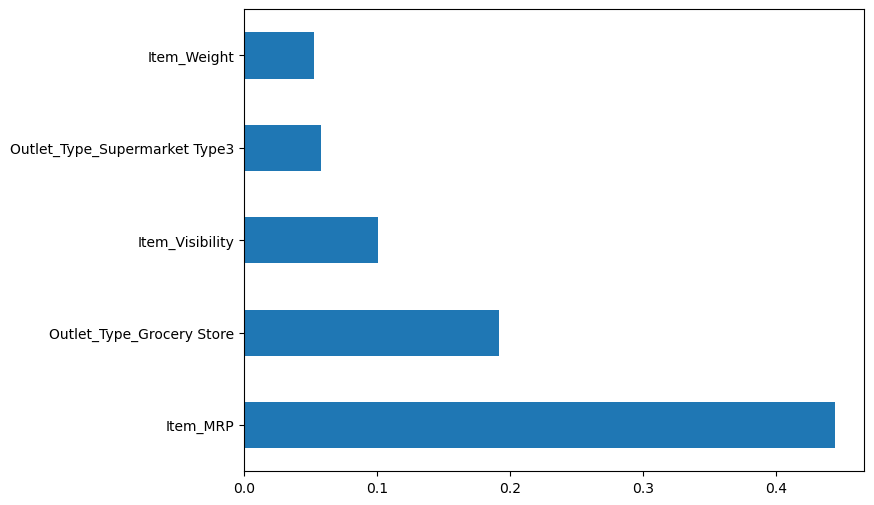

In [57]:
## just keep the top 5 importances and plot
sorted_importance.head(5).plot(kind='barh',
                                   figsize=(8,6))

In [58]:
## Saving the feature importances sorted from smallest to largest (ascending=True)
sorted_importance = importances.sort_values()
sorted_importance

Item_Type_Others                  0.00
Outlet_Type_Supermarket Type2     0.00
Item_Type_Seafood                 0.00
Outlet_Type_Supermarket Type1     0.00
Outlet_Size_Large                 0.00
Item_Type_Breads                  0.00
Item_Type_Breakfast               0.00
Item_Type_Hard Drinks             0.00
Outlet_Location_Type_Tier 3       0.00
Item_Type_Starchy Foods           0.00
Item_Type_Meat                    0.00
Outlet_Location_Type_Tier 2       0.00
Item_Type_Baking Goods            0.00
Item_Type_Health and Hygiene      0.00
Outlet_Size_Medium                0.00
Item_Type_Canned                  0.00
Outlet_Location_Type_Tier 1       0.00
Outlet_Size_MISSING               0.01
Item_Type_Soft Drinks             0.01
Item_Type_Frozen Foods            0.01
Item_Type_Dairy                   0.01
Item_Type_Household               0.01
Outlet_Size_Small                 0.01
Item_Type_Fruits and Vegetables   0.01
Item_Type_Snack Foods             0.01
Item_Fat_Content_Regular 

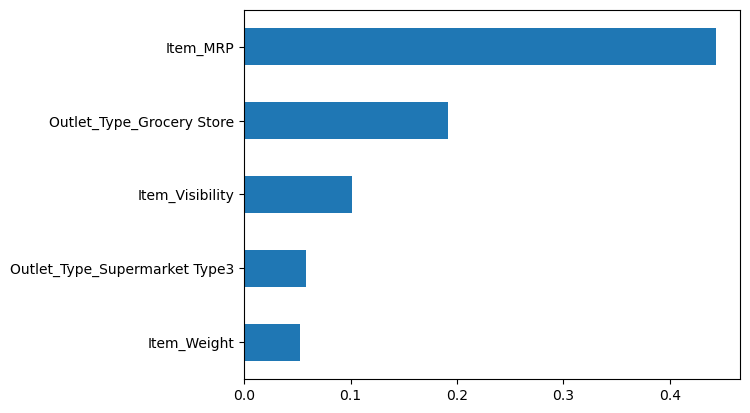

In [59]:
## just keep the top 5 importances and plot (that are now at the bottom of our series)
ax = sorted_importance.tail(5).plot(kind='barh')

In [62]:
importances = get_importances(dec_tree,sort=True,ascending=False)
importances

Item_MRP                          0.55
Outlet_Type_Grocery Store         0.32
Outlet_Type_Supermarket Type3     0.10
Outlet_Establishment_Year         0.03
Item_Visibility                   0.00
Item_Weight                       0.00
Item_Fat_Content_Regular          0.00
Item_Type_Meat                    0.00
Item_Type_Breads                  0.00
Item_Type_Starchy Foods           0.00
Outlet_Type_Supermarket Type2     0.00
Outlet_Type_Supermarket Type1     0.00
Outlet_Location_Type_Tier 3       0.00
Outlet_Location_Type_Tier 2       0.00
Outlet_Location_Type_Tier 1       0.00
Outlet_Size_Small                 0.00
Outlet_Size_Medium                0.00
Outlet_Size_MISSING               0.00
Outlet_Size_Large                 0.00
Item_Type_Soft Drinks             0.00
Item_Type_Breakfast               0.00
Item_Type_Snack Foods             0.00
Item_Type_Seafood                 0.00
Item_Type_Baking Goods            0.00
Item_Type_Household               0.00
Item_Type_Health and Hygi

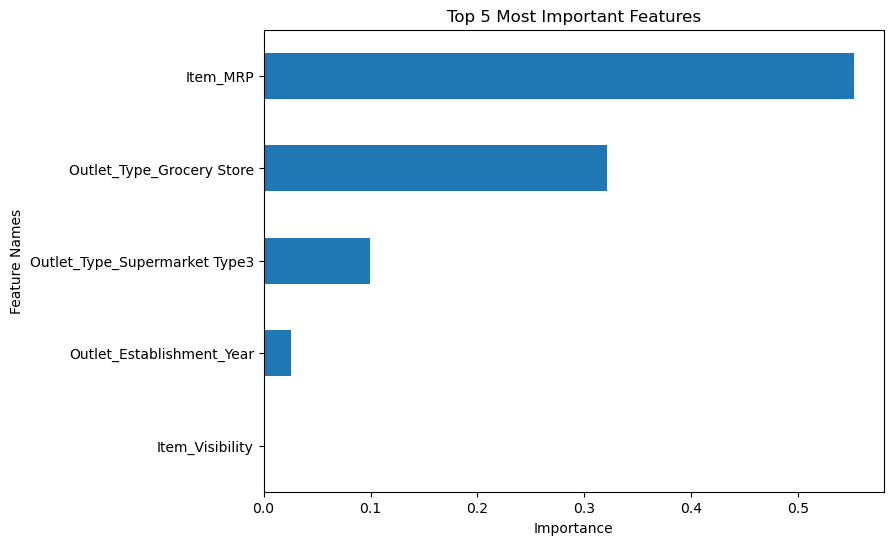

In [65]:
## testing our function
plot_importance(importances, top_n=5)
plt.savefig('dec_tree.png', dpi=300, bbox_inches='tight')


- Using the DecisionTreeRegressor model, we found that these top 5 features were of the most importance in making the model.

In [67]:
## saving variables for next lesson/notebook
import joblib
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'DecisionTreeRegressor':dec_tree}
joblib.dump(export, 'dec_tree_best-models.joblib')

['dec_tree_best-models.joblib']